**Nama : Delfrin Adiyatma Situmeang**

**Batch : MSIB**

`Program ini dibuat untuk menggunakan feature engineering untuk mengolah data mentah menjadi data siap pakai yang akan dimodelkan dengan Linear Regression`

# Importing Libraries

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler

# Pemodelan ML
from sklearn.linear_model import LinearRegression

# Evaluasi Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# save model
import pickle
import joblib
import json

# Data Loading

In [453]:
#Baca data dan tampilkan
df = pd.read_csv('insurance (1).csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [454]:
#Menggali informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


`Terlihat bahwa dataset tidak memiliki missing values dan tipe data dari fitur dan target sudah benar`

In [455]:
#Cek data duplikat
df.duplicated().sum()

1

`Terdapat 1 duplikasi padas data, sehingga akan di drop`

In [456]:
#Cek informasi statistik dari numerical features
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


`Dapat dilihat bahwa mean dan median dari semua fitur cenderung sama, sehingga dapat kita simpulkan bahwa ketiganya terdistribusi secara normal akan tetapi tetap perlu analisis lanjutan. Sedangkan pada target terdapat perbedaan nilai median dan mean, sehingga akan dianalisis lebih lanjut`

In [457]:
#mencari skewness
skewness = df[['age', 'bmi', 'children', 'charges']].skew()

# Kategorisasi skewness
def categorize_skewness(skew):
    if skew > 0.5:
        return 'High Positive Skewness'
    elif skew < -0.5:
        return 'High Negative Skewness'
    elif abs(skew) <= 0.5:
        return 'Low Skewness'

# Menerapkan fungsi kategorisasi pada setiap kolom
skewness_categories = skewness.apply(categorize_skewness)
df_skewness = pd.DataFrame({'column': skewness.index, 'skewness_category': skewness_categories})

print("DataFrame dengan Kategori Skewness:")
df_skewness

DataFrame dengan Kategori Skewness:


,column,skewness_category
age,age,Low Skewness
bmi,bmi,Low Skewness
children,children,High Positive Skewness
charges,charges,High Positive Skewness


**Analisis Kolom Charges**

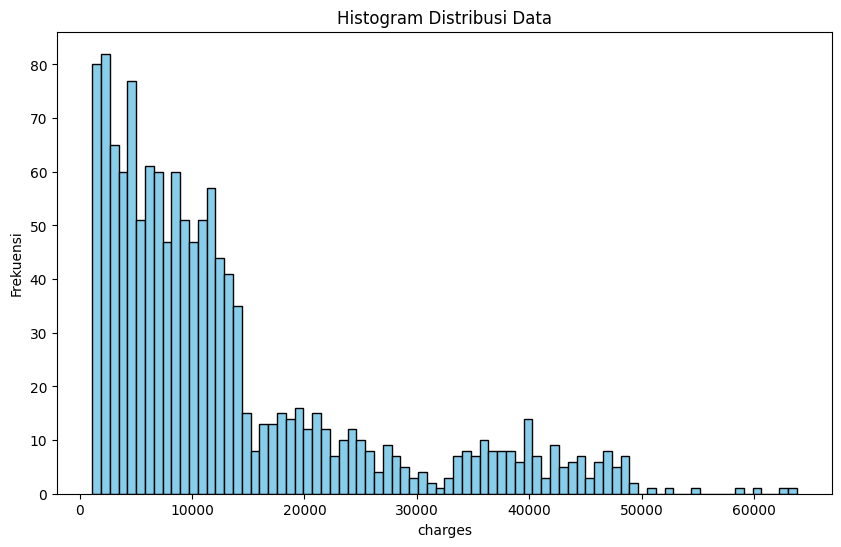

In [458]:
# Plotting histogram distribusi
plt.figure(figsize=(10, 6))
plt.hist(df['charges'], bins=80, color='skyblue', edgecolor = 'black')
plt.xlabel('charges')
plt.ylabel('Frekuensi')
plt.title('Histogram Distribusi Data')
plt.show()

`Berdasarkan histogram distribusi, terlihat bahwa distribusi dari 'charges' tidak simetris (tidak normal) dan menunjukan pola positive skewness yang berarti median (nilai tengah) cenderung lebih kecil dari mean (rata-rata), karena distribusi data terpengaruh oleh nilai-nilai yang tinggi di ekor distribusi. `

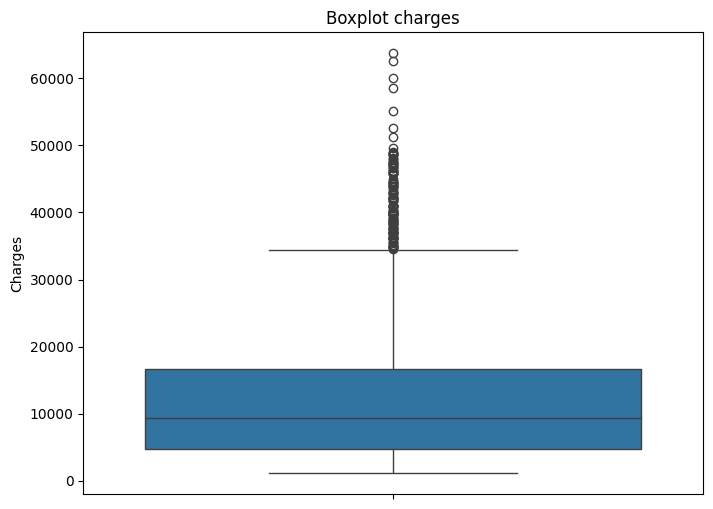

In [459]:
# Plotting Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='charges')
plt.title('Boxplot charges')
plt.ylabel('Charges')
plt.show()

`Berdasarkan boxplot dari 'charges', terdapat cukup banyak outlier yang terletak di sisi kanan distribusi (nilai yang jauh lebih tinggi dari sebagian besar observasi lainnya) yang mewakili nilai-nilai yang ekstrem dalam data, yang akan memiliki dampak besar terhadap rata-rata dan analisis statistik lainnya sehingga nantinya akan di handle.`

**Analisis BMI**

In [460]:
# Kategorisasi BMI
def categorize_bmi(bmi):
    if 30 <= bmi < 35:
        return 'overweight class 1'
    elif 35 <= bmi < 40:
        return 'overweight class 2'
    elif bmi >= 40:
        return 'overweight class 3'
    else:
        return 'not overweight'

# Menerapkan fungsi kategorisasi pada setiap kolom
bmi_categories = df['bmi'].apply(categorize_bmi)
df_bmi = pd.DataFrame({'column': df['bmi'].index, 'bmi_category': bmi_categories})

print("DataFrame BMI:")
df_bmi

DataFrame BMI:


,column,bmi_category
0,0,not overweight
1,1,overweight class 1
2,2,overweight class 1
3,3,not overweight
4,4,not overweight
...,...,...
1333,1333,overweight class 1
1334,1334,overweight class 1
1335,1335,overweight class 2
1336,1336,not overweight


In [461]:
bmic = pd.DataFrame(df_bmi['bmi_category'].value_counts())
bmic

,count
bmi_category,
not overweight,631
overweight class 1,391
overweight class 2,225
overweight class 3,91


C:\Users\adiya\AppData\Local\Temp\ipykernel_19956\1477478311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'bmi_category', y = 'count',data = bmic, palette='viridis')


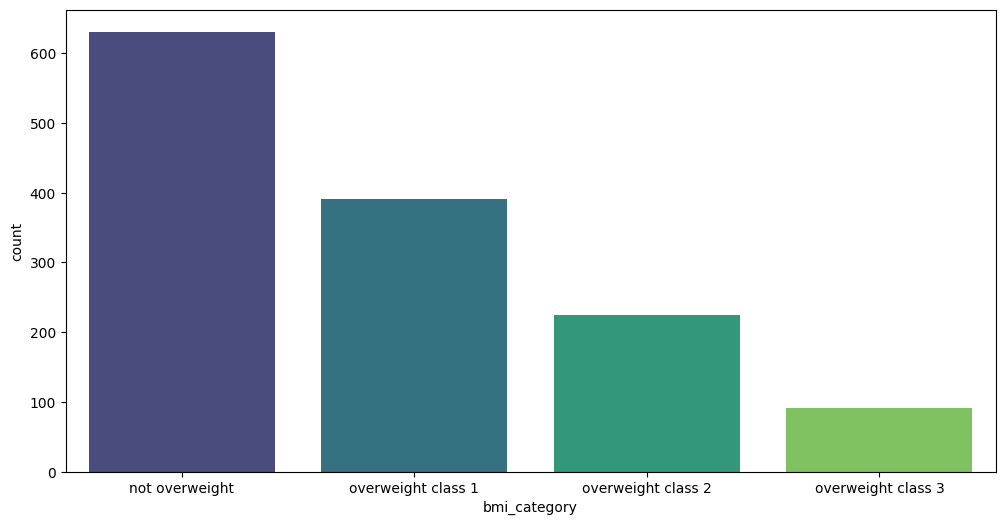

In [462]:
# Plotting barplot urutan BMI overweight
plt.figure(figsize=(12, 6))
sns.barplot(x = 'bmi_category', y = 'count',data = bmic, palette='viridis')
plt.show()

`Dapat dilihat bahwa jumlah overweight kelas 1 lebih banyak dibanding overweight kelas 2 lebih banyak dibanding overweight kelas 3`

**Lmplot**

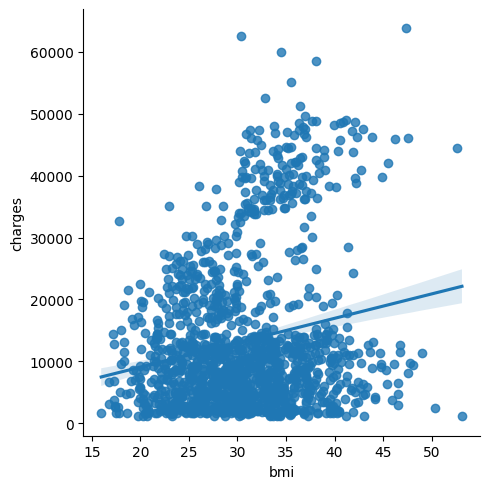

In [463]:
#lmplot melihat hubungan
sns.lmplot(df, x='bmi', y='charges')

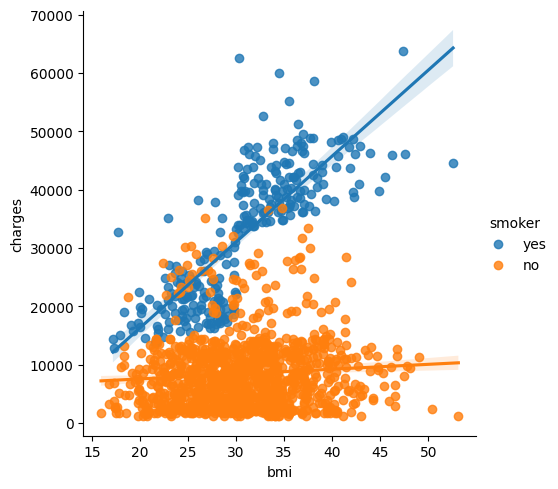

In [464]:
#lmplot melihat hubungan
sns.lmplot(df, x='bmi', y='charges', hue='smoker')

`Terlihat dari lmplot pertama bahwa jika seseorang bukan merupakan perokok, bmi tidak terlalu memengaruhi charges yang diberikan. Namun dari lmplot kedua kita dapat menyimpulkan bahwa jika seseorang merupakan perokok maka bmi akan mempengaruhi charges yang diberikan`

**Analisis Fitur Numerikal**

In [465]:
correlation = df.select_dtypes(include=['int', 'float']).corr(method = 'spearman')['charges']

# Mencari dan Menampilkan korelasi yang lebih dari 0.1
high_correlation = correlation[correlation > 0.1]

print("Korelasi yang Lebih dari 0.1:")
print(high_correlation)

Korelasi yang Lebih dari 0.1:
age         0.534392
bmi         0.119396
children    0.133339
charges     1.000000
Name: charges, dtype: float64


`Dapat dilihat bahwa semua fitur numerikal memiliki korelasi yang cukup tinggi dengan target, dan akan digunakan dalam proses modelling`

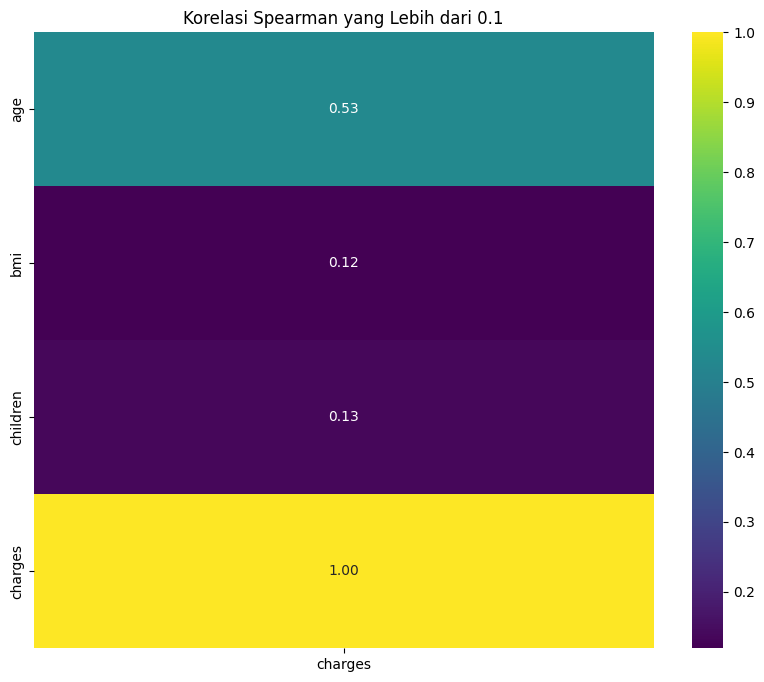

In [466]:
df_high_correlation = pd.DataFrame(high_correlation)

# Plot heatmap korelasi tinggi
plt.figure(figsize=(10, 8))
sns.heatmap(df_high_correlation, annot=True, cmap='viridis', fmt=".2f")
plt.title('Korelasi Spearman yang Lebih dari 0.1')
plt.show()

**Analisis Fitur Kategorikal**

In [467]:
#Cek fitur kategorik
category_ft = df.select_dtypes(include=['object','category']).columns.tolist()
for column in df[category_ft]:
    print(f'{column} : {df[column].unique()}')
    print()

sex : ['female' 'male']

smoker : ['yes' 'no']

region : ['southwest' 'southeast' 'northwest' 'northeast']



In [468]:
from scipy.stats import kendalltau
# Mendapatkan kolom kategorikal
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Hitung korelasi menggunakan Kendall Tau untuk setiap kolom kategorikal
for col in categorical_columns:
    tau, p_value = kendalltau(df[col], df['charges'])
    print(f"Korelasi menggunakan Kendall Tau untuk kolom '{col}':")
    print("Nilai tau:", tau)
    print("p-value:", p_value)
    print("\n")

Korelasi menggunakan Kendall Tau untuk kolom 'sex':
Nilai tau: 0.00775121171134058
p-value: 0.7285979314958788


Korelasi menggunakan Kendall Tau untuk kolom 'smoker':
Nilai tau: 0.541915568588744
p-value: 5.2590182674985486e-130


Korelasi menggunakan Kendall Tau untuk kolom 'region':
Nilai tau: -0.03211188119370342
p-value: 0.11540770904943377




`Jika nilai p-value kurang dari 0.05, maka dapat disimpulkan bahwa terdapat korelasi yang signifikan antara dua variabel. Sehingga fitur yang berkorelasi tinggi dan akan digunakan pada proses modelling dengan variabel target 'charge' adalah 'smoker'`

# Splitting Data

In [469]:
x = df.drop('charges', axis=1) #dataframe fitur
y = df['charges'] #dataframe target

In [470]:
#split data menjadi train dan test set
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   random_state=2)
print('Size Train-Set : ', x_train.shape)
print('Size Test-Set  : ', x_test.shape)

Size Train-Set :  (1070, 6)
Size Test-Set  :  (268, 6)


In [471]:
#cek
x_train

,age,sex,bmi,children,smoker,region
882,21,female,22.135,0,no,northeast
505,37,male,30.875,3,no,northwest
798,58,female,33.100,0,no,southwest
792,22,female,23.180,0,no,northeast
201,48,female,32.230,1,no,southeast
...,...,...,...,...,...,...
466,60,female,28.700,1,no,southwest
299,48,female,28.880,1,no,northwest
493,61,male,43.400,0,no,southwest
527,51,female,25.800,1,no,southwest


In [472]:
#cek
x_test

,age,sex,bmi,children,smoker,region
17,23,male,23.845,0,no,northeast
1091,55,female,29.830,0,no,northeast
273,50,male,27.455,1,no,northeast
270,18,male,29.370,1,no,southeast
874,44,male,21.850,3,no,northeast
...,...,...,...,...,...,...
232,19,female,17.800,0,no,southwest
323,57,male,40.945,0,no,northeast
1337,61,female,29.070,0,yes,northwest
1066,48,male,37.290,2,no,southeast


# Feature Engineering

**Duplicated Data Handling**

In [473]:
x_train_nodup = x_train.drop_duplicates()
x_train_nodup

,age,sex,bmi,children,smoker,region
882,21,female,22.135,0,no,northeast
505,37,male,30.875,3,no,northwest
798,58,female,33.100,0,no,southwest
792,22,female,23.180,0,no,northeast
201,48,female,32.230,1,no,southeast
...,...,...,...,...,...,...
466,60,female,28.700,1,no,southwest
299,48,female,28.880,1,no,northwest
493,61,male,43.400,0,no,southwest
527,51,female,25.800,1,no,southwest


`1 duplikat yang ada telah dihapus dari dataset train`

In [474]:
print("Jumlah baris data train:, ", len(x_train_nodup))
print("Jumlah baris data train:, ", len(y_train))

Jumlah baris data train:,  1069
Jumlah baris data train:,  1070


`Terlihat bahwa jumlah row dari kedua dataset berbeda karena drop duplikat yang dilakukan sebelumnya, maka akan di handle`

In [475]:
#Menyamakan jumlah baris
y_train_nodup = y_train.loc[x_train_nodup.index]

In [476]:
#cek jumlah baris
print("Jumlah baris data train:, ", len(x_train_nodup))
print("Jumlah baris data train:, ", len(y_train_nodup))

Jumlah baris data train:,  1069
Jumlah baris data train:,  1069


In [477]:
#cek jumlah baris
print("Jumlah baris data train:, ", len(x_test))
print("Jumlah baris data train:, ", len(y_test))

Jumlah baris data train:,  268
Jumlah baris data train:,  268


`Dapat dilihat bahwa jumlah baris dari data fitur maupun target telah sama`

**Feature Selection**

`Berdasarkan hasil EDA, fitur yang berkorelasi tinggi dengan target "charges" dan akan digunakan adalah age, bmi, children, smoker`

In [478]:
#Buat Dataframe x_train dengan fitur yang terpilih
x_train_new = x_train_nodup[['age', 'bmi', 'children', 'smoker']]
x_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, 882 to 1192
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1069 non-null   int64  
 1   bmi       1069 non-null   float64
 2   children  1069 non-null   int64  
 3   smoker    1069 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 41.8+ KB


In [479]:
#Buat Dataframe x_test dengan fitur yang terpilih
x_test_new = x_test[['age', 'bmi', 'children', 'smoker']]
x_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 17 to 966
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       268 non-null    int64  
 1   bmi       268 non-null    float64
 2   children  268 non-null    int64  
 3   smoker    268 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 10.5+ KB


**Outlier Handling**

`Pada proses EDA kita ketahui bahwa terdapat outlier pada variabel target 'charges' maka outlier - outlier tersebut akan di remove`

In [480]:
#Cek skewness pada charge 
skewness_charge_train = y_train_nodup.skew()
skewness_charge_train

1.5062004994981373

In [481]:
#Ubah jadi dataframe
y_train_df = pd.DataFrame(y_train_nodup)
y_train_df

,charges
882,2585.85065
505,6796.86325
798,11848.14100
792,2731.91220
201,8871.15170
...,...
466,13224.69300
299,9249.49520
493,12574.04900
527,9861.02500


In [482]:
#Ubah jadi dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

,charges
17,2395.17155
1091,11286.53870
273,9617.66245
270,1719.43630
874,8891.13950
...,...
232,1727.78500
323,11566.30055
1337,29141.36030
1066,8978.18510


`Berdasarkan skewness, target akan di trim dengan method iqr`

In [483]:
#definisikan outlier trimmer
from feature_engine.outliers import OutlierTrimmer
ot_skew = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5,variables=['charges'])

In [484]:
#trim outlier pada target train
y_train_trim = ot_skew.fit_transform(y_train_df)

In [485]:
#trim outlier pada target train
y_test_trim = ot_skew.fit_transform(y_test_df)

In [486]:
#Cek panjang fitur target
print('Panjang data fitur train :', len(x_train_new))
print('Panjang data target train :', len(y_train_trim))

Panjang data fitur train : 1069
Panjang data target train : 963


In [487]:
#Cek panjang fitur target
print('Panjang data fitur train :', len(x_test_new))
print('Panjang data target train :', len(y_test_trim))

Panjang data fitur train : 268
Panjang data target train : 241


`Dikarenakan panjang dari xdan y berbeda setelah proses trimming maka akan dilakukan penyesuaian jumlah baris`

In [488]:
#Penyesuaian index
x_train_trim = x_train_new.loc[y_train_trim.index]
x_test_trim = x_test_new.loc[y_test_trim.index]

In [489]:
#Cek panjang fitur target
print('Panjang data fitur train :', len(x_train_trim))
print('Panjang data target train :', len(y_train_trim))

Panjang data fitur train : 963
Panjang data target train : 963


In [490]:
#Cek panjang fitur target
print('Panjang data fitur train :', len(x_test_trim))
print('Panjang data target train :', len(y_test_trim))

Panjang data fitur train : 241
Panjang data target train : 241


`Terlihat bahwa outlier telah berhasil di remove dan index telah berhasil disesuaikan`



**Scaling**

`Karena terdapat 3 fitur numerik dengan skala yang berbeda - beda maka akan dilakukan proses scaling`

In [491]:
#Scaling
list_num= ['age','bmi','children']
mm_scaler= MinMaxScaler()
mm_scaler.fit(x_train_trim[list_num])
x_train_trim[list_num]= mm_scaler.transform(x_train_trim[list_num])
x_test_trim[list_num]= mm_scaler.transform(x_test_trim[list_num])

In [492]:
x_train_trim.head()

,age,bmi,children,smoker
882,0.065217,0.158498,0.0,no
505,0.413043,0.418889,0.6,no
798,0.869565,0.485178,0.0,no
792,0.086957,0.189632,0.0,no
201,0.652174,0.459258,0.2,no


In [493]:
x_test_trim.head()

,age,bmi,children,smoker
17,0.108696,0.209444,0.0,no
1091,0.804348,0.387755,0.0,no
273,0.695652,0.316997,0.2,no
270,0.000000,0.374050,0.2,no
874,0.565217,0.150007,0.6,no


`Terlihat bahwa skala dari masing - masing fitur numerik telah berhasil di normalisasi`

**Encoding**

`Karena terdapat fitur kategorik 'smoker' pada dataset train dan test, maka akan dilakukan encoding `

In [494]:
#encode
list_nom= ['smoker']

enc_ohe= OneHotEncoder(sparse_output=False)
enc_ohe.fit(x_train_trim[list_nom])
x_train_ohe= enc_ohe.transform(x_train_trim[list_nom])
x_test_ohe= enc_ohe.transform(x_test_trim[list_nom])

In [495]:
#cek
x_train_ohe

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [496]:
#mendapatkan nama fitur
feature_names= enc_ohe.get_feature_names_out(input_features=list_nom)
print(feature_names)

['smoker_no' 'smoker_yes']


In [497]:
x_train_ohe_df = pd.DataFrame(x_train_ohe, columns=feature_names)
x_train_ohe_df.head()

,smoker_no,smoker_yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [498]:
x_test_ohe_df = pd.DataFrame(x_test_ohe, columns=feature_names)
x_test_ohe_df.head()

,smoker_no,smoker_yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [499]:
#resetting index yang ada
x_train_trim.reset_index(drop=True, inplace=True)
x_test_trim.reset_index(drop=True, inplace=True)

In [500]:
#Gabungkan dataframe setelah encoding
x_train_final = pd.concat([x_train_trim, x_train_ohe_df],axis=1)
x_test_final = pd.concat([x_test_trim, x_test_ohe_df],axis=1)

In [501]:
#Drop kolom smoker
x_train_final.drop('smoker',axis=1,inplace=True)
x_test_final.drop('smoker',axis=1,inplace=True)

In [502]:
x_train_final.head()

,age,bmi,children,smoker_no,smoker_yes
0,0.065217,0.158498,0.0,1.0,0.0
1,0.413043,0.418889,0.6,1.0,0.0
2,0.869565,0.485178,0.0,1.0,0.0
3,0.086957,0.189632,0.0,1.0,0.0
4,0.652174,0.459258,0.2,1.0,0.0


In [503]:
x_test_final.head()

,age,bmi,children,smoker_no,smoker_yes
0,0.108696,0.209444,0.0,1.0,0.0
1,0.804348,0.387755,0.0,1.0,0.0
2,0.695652,0.316997,0.2,1.0,0.0
3,0.000000,0.374050,0.2,1.0,0.0
4,0.565217,0.150007,0.6,1.0,0.0


# Linear Model Regression

**Model Definition**

`Model Linear Regression adalah suatu model yang menggambarkan hubungan linier antara satu atau lebih variabel independen (fitur) dan variabel dependen (target). Algoritma ini dapat memberikan estimasi yang baik dan akurat jika hubungan antara fitur dan target adalah linier.`

**Hyperparameter:**

- fit_intercept

**Metrik:**
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R2 score

**Model Training**

In [504]:
linreg= LinearRegression()

linreg.fit(x_train_final, y_train_trim)

LinearRegression()

**Model Evaluation**

In [505]:
#lakukan prediksi
y_pred_train = linreg.predict(x_train_final)
y_pred_test = linreg.predict(x_test_final)

#cari MAE
print('MAE - Train Set : ', mean_absolute_error(y_train_trim, y_pred_train))
print('MAE - Test Set  : ', mean_absolute_error(y_test_trim, y_pred_test))

MAE - Train Set :  2781.3471845666895
MAE - Test Set  :  2512.443378071066


`Diperoleh rata-rata kesalahan prediksi model adalah sekitar 2512 unit dari nilai yang sebenarnya pada data uji dan sekitar 2781 data latih. Semakin rendah nilai MAE, semakin baik kinerja modelnya. Dengan demikian, dapat disimpulkan model tampaknya memiliki kinerja yang konsisten namun kurang akurat pada dataset.`

In [506]:
#cari MSE
print('MSE - Train Set : ', mean_squared_error(y_train_trim, y_pred_train))
print('MSE - Test Set  : ', mean_squared_error(y_test_trim, y_pred_test))

MSE - Train Set :  23188507.3441515
MSE - Test Set  :  18966518.657948993


`Diperoleh MSE yaitu 23188507 (untuk data latih) dan 18966518 (untuk data uji). Semakin rendah nilai MSE, semakin akurat prediksi model. Dengan demikian, dapat disimpulkan model tampaknya memiliki kinerja yang tidak konsisten di kedua dataset.`

In [507]:
#cari r2 score
print('r2 score - Train Set : ', r2_score(y_train_trim, y_pred_train))
print('r2 score - Test Set  : ', r2_score(y_test_trim, y_pred_test))

r2 score - Train Set :  0.5834460202063845
r2 score - Test Set  :  0.6420041220183446


`R-squared score dari kedua dataset berkisar diantara 0.58 dan 0.64. Ini berarti bahwa sekitar 0.58% dan 0.64% dari variasi dalam target dapat dijelaskan oleh fitur-fitur yang digunakan dalam model. Nilai R^2 yang diperoleh termasuk tinggi, ini menunjukkan bahwa model memiliki kemampuan yang tidak begitu baik untuk memprediksi target, dan memiliki kinerja yang kurang konsisten di kedua dataset tersebut.`

In [508]:
#Cek residual
y_test_residuals = y_test_trim - y_pred_test
y_test_residuals

,charges
17,-1320.404960
1091,-274.094840
273,-1060.771534
270,-1576.947169
874,-909.570880
...,...
232,-696.717908
323,-1114.158426
1337,801.158101
1066,-2236.247411


In [509]:
#Cek nilai maksimal dan minimal prediksi
print('Charge maksimal Prediksi:', y_pred_test.max())
print('Charge minimal Prediksi:', y_pred_test.min())

Charge maksimal Prediksi: 28731.58076975403
Charge minimal Prediksi: 2082.466990062542


In [510]:
#Cek nilai maksimal dan minimal aktual
print('Charge maksimal aktual:', y_test_trim.max())
print('Charge minimal aktual:', y_test_trim.min())

Charge maksimal aktual: charges    34472.841
dtype: float64
Charge minimal aktual: charges    1121.8739
dtype: float64


`Terdapat selisih nilai yang cukup signifikan antara harga maksimal minimal prediksi dan aktual, ini menandakan bahwa model yang dibangun tidak dapat memprediksi data dengan sempurna`

**Model Saving**

In [511]:
with open('model_linreg.pkl', 'wb') as file1:
  joblib.dump(linreg, file1)

with open('enc_ohe.pkl', 'wb') as file3:
  joblib.dump(enc_ohe, file3)

with open('mm_scaler.pkl', 'wb') as file4:
  joblib.dump(mm_scaler, file4)

In [512]:
# Load model & Preprocessing
with open('model_linreg.pkl', 'rb') as file1:
  model_linreg= joblib.load(file1)

with open('enc_ohe.pkl', 'rb') as file3:
  enc_ohe= joblib.load(file3)

with open('mm_scaler.pkl', 'rb') as file4:
  mm_scaler= joblib.load(file4)

**Model Inference**

In [513]:
data_inf= {
    'age': [20, 30],
    'sex': ['male', 'female'],
    'bmi':[46.5, 30.5],
    'children': [3, 0],
    'smoker': ['yes','no'],
    'region': ['southeast','northwest']
}

df_inf_test= pd.DataFrame(data_inf)

In [514]:
df_inf_test

,age,sex,bmi,children,smoker,region
0,20,male,46.5,3,yes,southeast
1,30,female,30.5,0,no,northwest


In [515]:
df_inf= df_inf_test.copy()

In [516]:
list_nom= ['smoker']

df_inf_ohe= enc_ohe.transform(df_inf[list_nom])

In [517]:
feature_names= enc_ohe.get_feature_names_out(input_features=list_nom)
print(feature_names)

['smoker_no' 'smoker_yes']


In [518]:
df_inf_ohe_df= pd.DataFrame(df_inf_ohe, columns=feature_names)
df_inf_ohe_df.head()

,smoker_no,smoker_yes
0,0.0,1.0
1,1.0,0.0


In [519]:
df_inf_final = pd.concat([df_inf, df_inf_ohe_df],axis=1)

In [520]:
df_inf_final.drop('smoker',axis=1, inplace=True)

In [521]:
list_num= ['age','bmi','children']
df_inf_final[list_num]= mm_scaler.transform(df_inf_final[list_num])

In [522]:
df_inf_final

,age,sex,bmi,children,region,smoker_no,smoker_yes
0,0.043478,male,0.884403,0.6,southeast,0.0,1.0
1,0.260870,female,0.407716,0.0,northwest,1.0,0.0


In [523]:
df_inf_final = df_inf_final.drop(columns=['region', 'sex'])

In [524]:
#prediksi
pred_inf = linreg.predict(df_inf_final)

In [525]:
df_inf_final['pred_charges']= pred_inf

In [526]:
df_inf_final

,age,bmi,children,smoker_no,smoker_yes,pred_charges
0,0.043478,0.884403,0.6,0.0,1.0,21043.626196
1,0.260870,0.407716,0.0,1.0,0.0,5744.990526


In [527]:
df_inf_test['pred_charges']= pred_inf
df_inf_test

,age,sex,bmi,children,smoker,region,pred_charges
0,20,male,46.5,3,yes,southeast,21043.626196
1,30,female,30.5,0,no,northwest,5744.990526


# Kesimpulan

`Dengan mengerjakan LC4 ini saya dapat memahami tentang konsep dasar regresi dan cara kerja model Linear Regression dalam memodelkan hubungan antara variabel independen dan dependen secara linier. Saya telah melakukan proses persiapan data dengan baik, termasuk mengatasi missing values, mengencode variabel kategorikal, melakukan scaling terhadap fitur-fitur numerik, serta memahami pentingnya pemisahan data menjadi data latih dan data uji untuk menghindari overfitting dan memvalidasi kinerja model Melakukan pelatihan (training) model dengan data latih dengan parameter yang tepat dan hasil yang memuaskan. Akan tetapi model hasil saya sepertinya underfit dan kurang memuaskan karena r2 score yang rendah`